<a href="https://colab.research.google.com/github/ImAli0/ML_and_DataScience/blob/main/20-Kmeans-Clustering/KMeans_Clustering_Project_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIA Country Analysis and Clustering

## Imports and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/CIA_Country_Facts.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [4]:
df[df['Country']=='Uzbekistan']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
216,Uzbekistan,C.W. OF IND. STATES,27307134,447400,61.0,0.0,-1.72,71.1,1700.0,99.3,62.9,10.83,0.83,88.34,1.0,26.36,7.84,0.342,0.229,0.43


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


<Axes: xlabel='Population', ylabel='Count'>

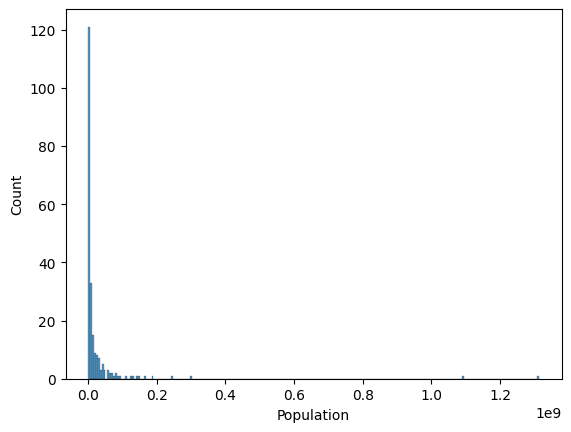

In [7]:
sns.histplot(df, x='Population')

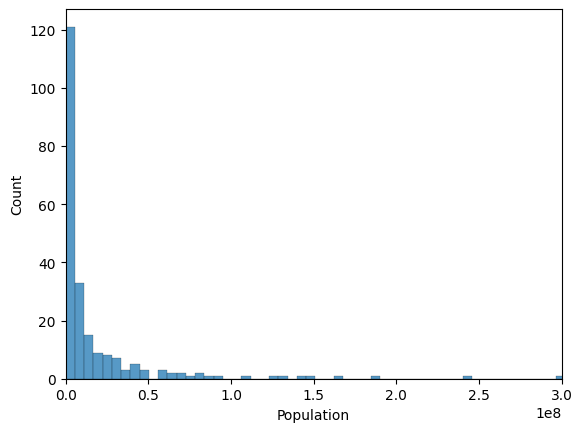

In [8]:
sns.histplot(df, x='Population')
plt.xlim(0, 3e+08);

In [9]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

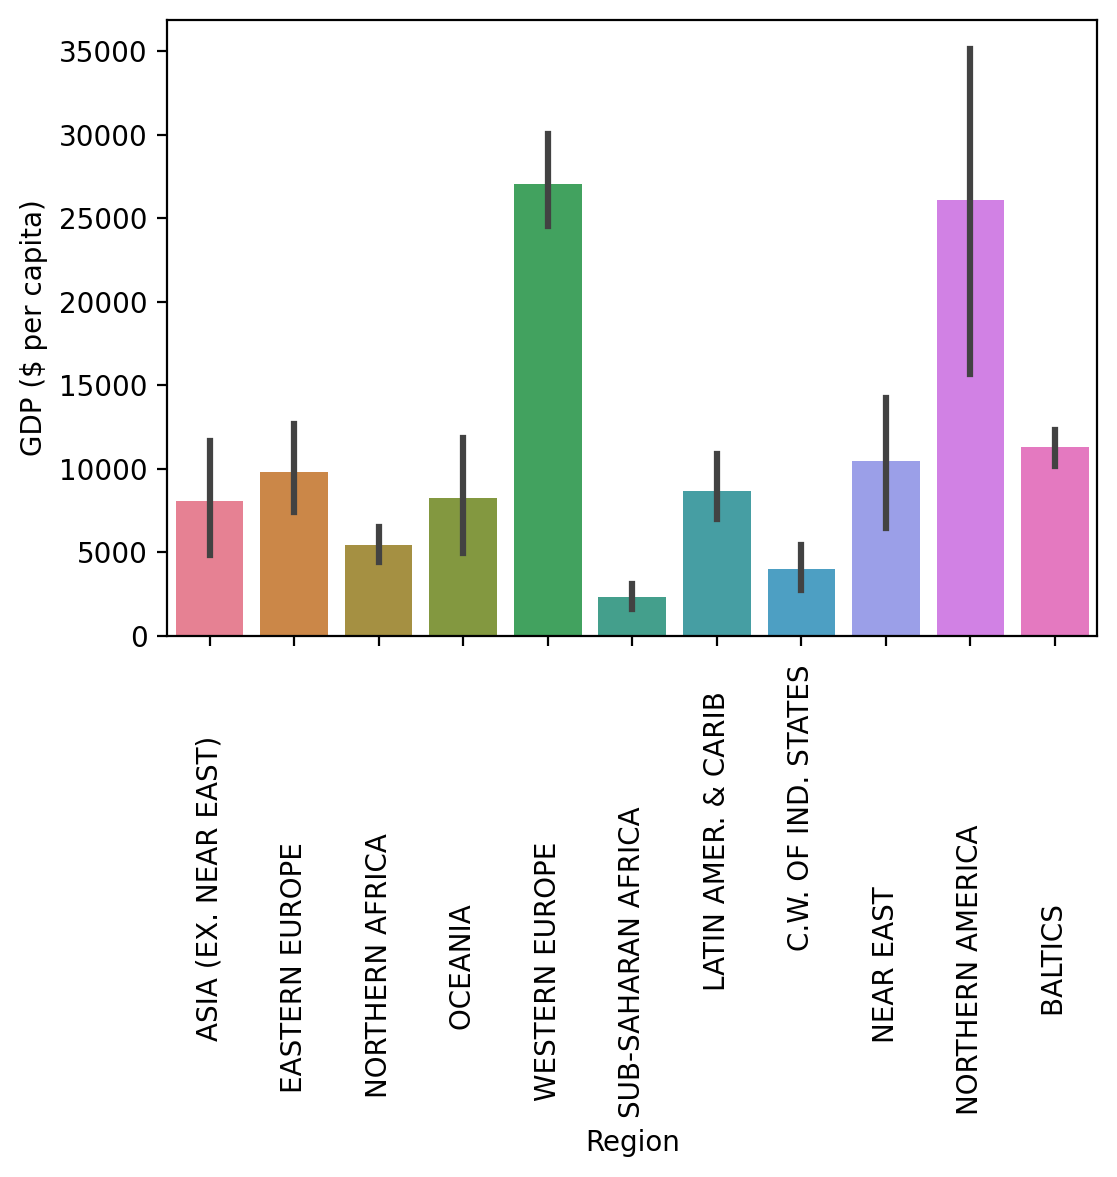

In [10]:
plt.figure(figsize=(6,4), dpi=200)
sns.barplot(df, x='Region', y='GDP ($ per capita)', hue='Region')
plt.xticks(rotation=90);

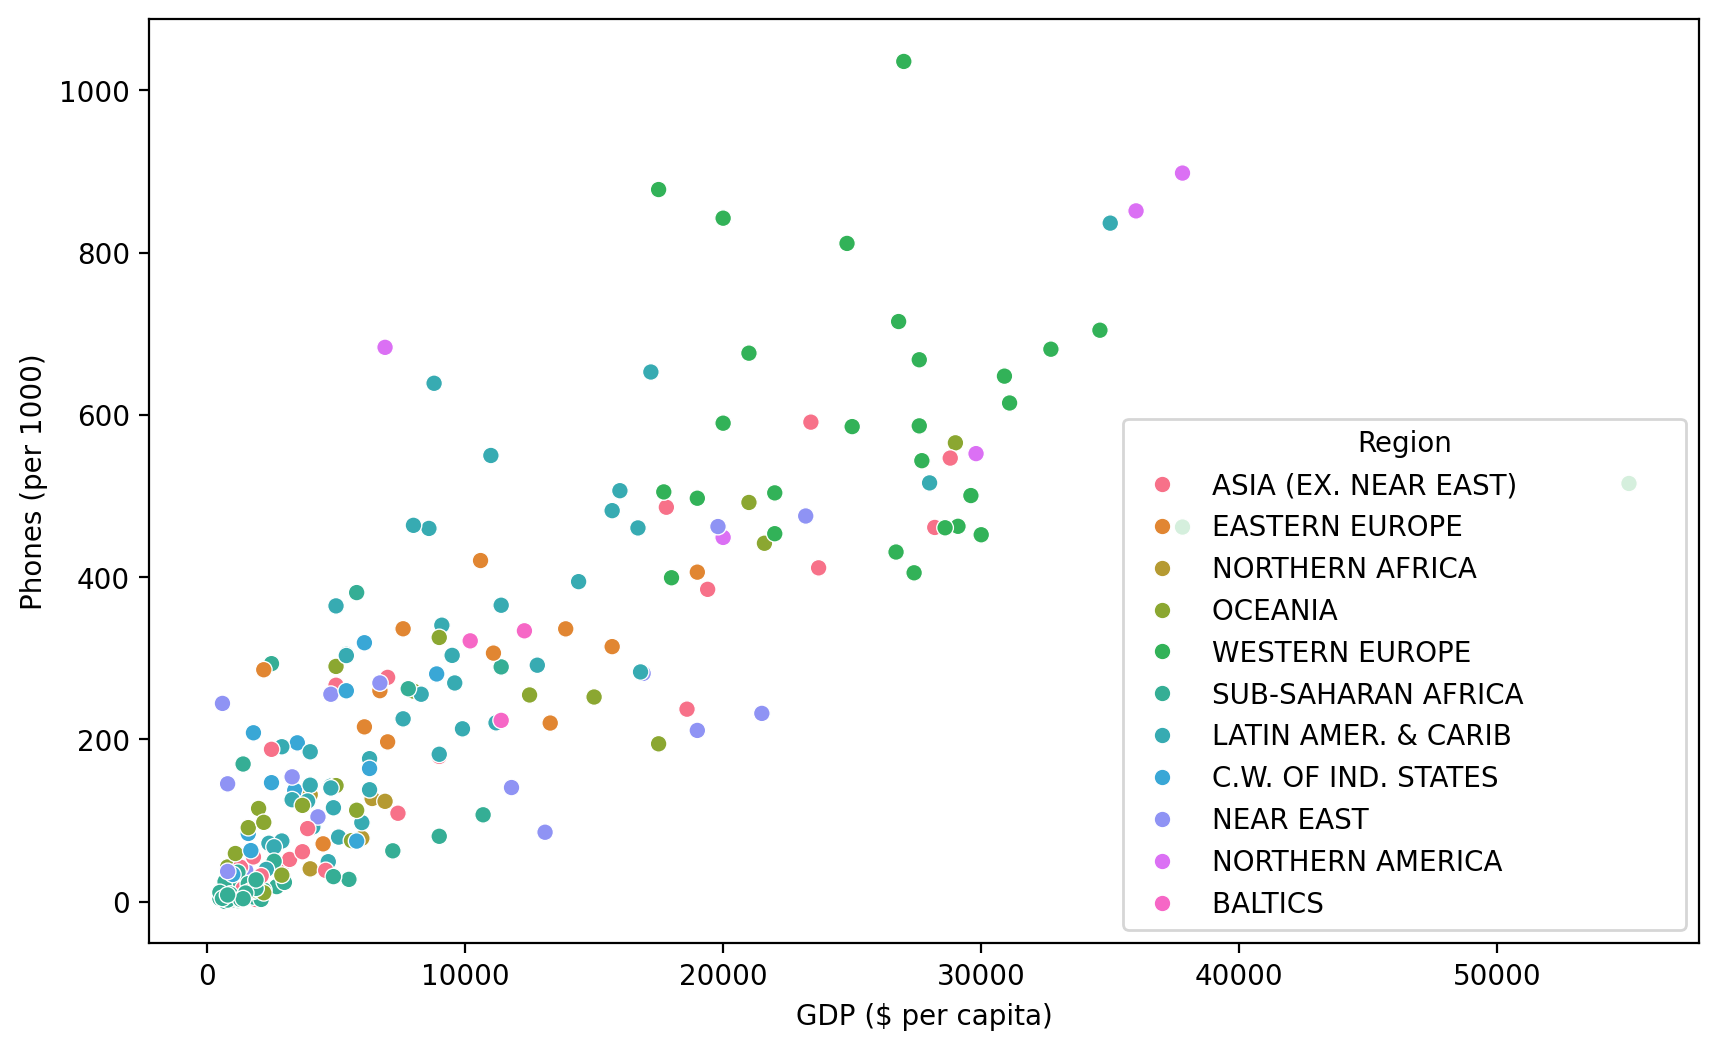

In [11]:
plt.figure(figsize=(10,6), dpi=200)
sns.scatterplot(df, x='GDP ($ per capita)', y='Phones (per 1000)', hue='Region');

<Axes: xlabel='GDP ($ per capita)', ylabel='Literacy (%)'>

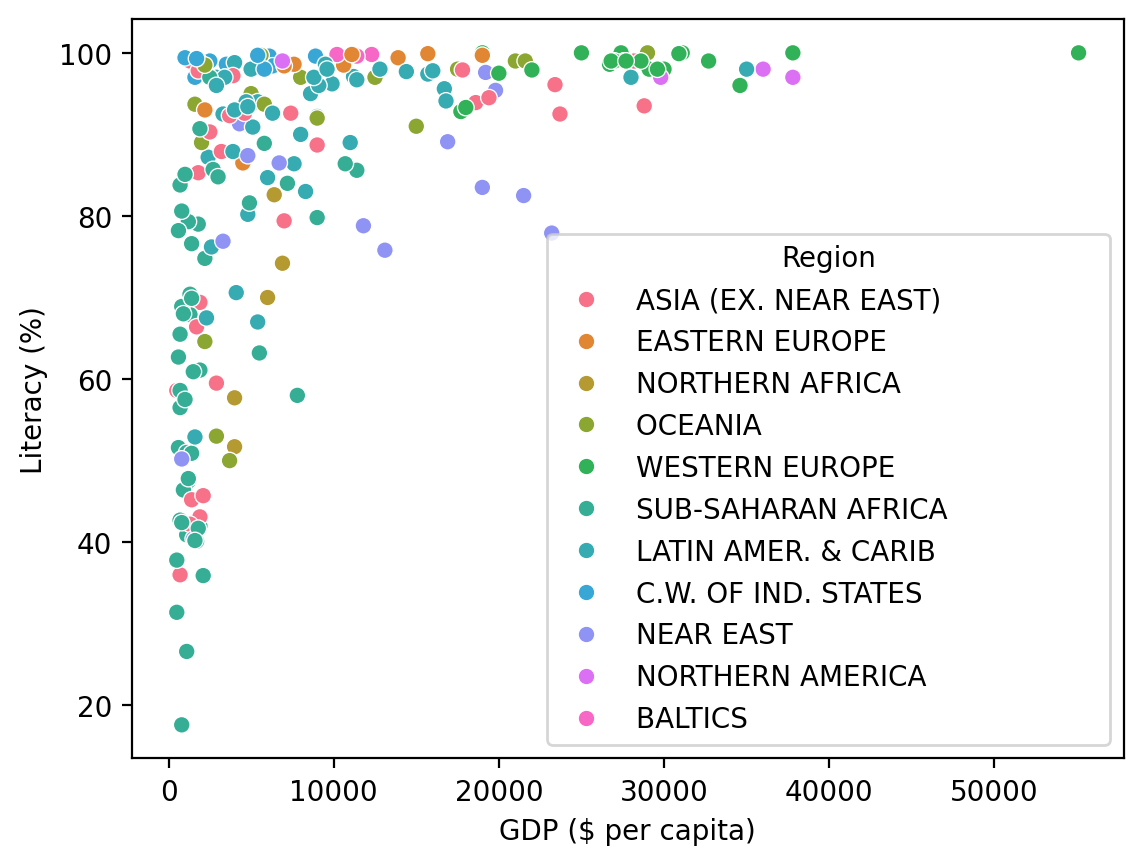

In [12]:
plt.figure(dpi=200)
sns.scatterplot(df, x='GDP ($ per capita)', y='Literacy (%)', hue='Region')

<Axes: >

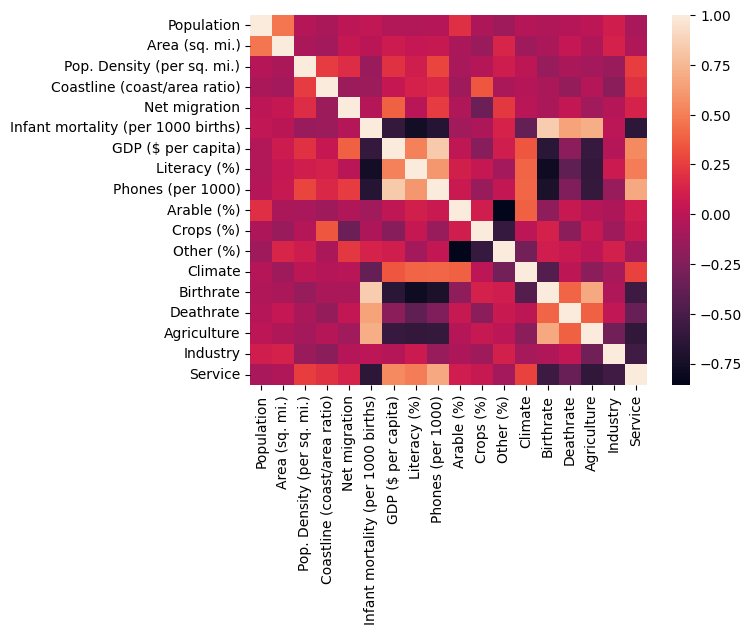

In [13]:
sns.heatmap(df.drop(['Country', 'Region'], axis=1).corr())

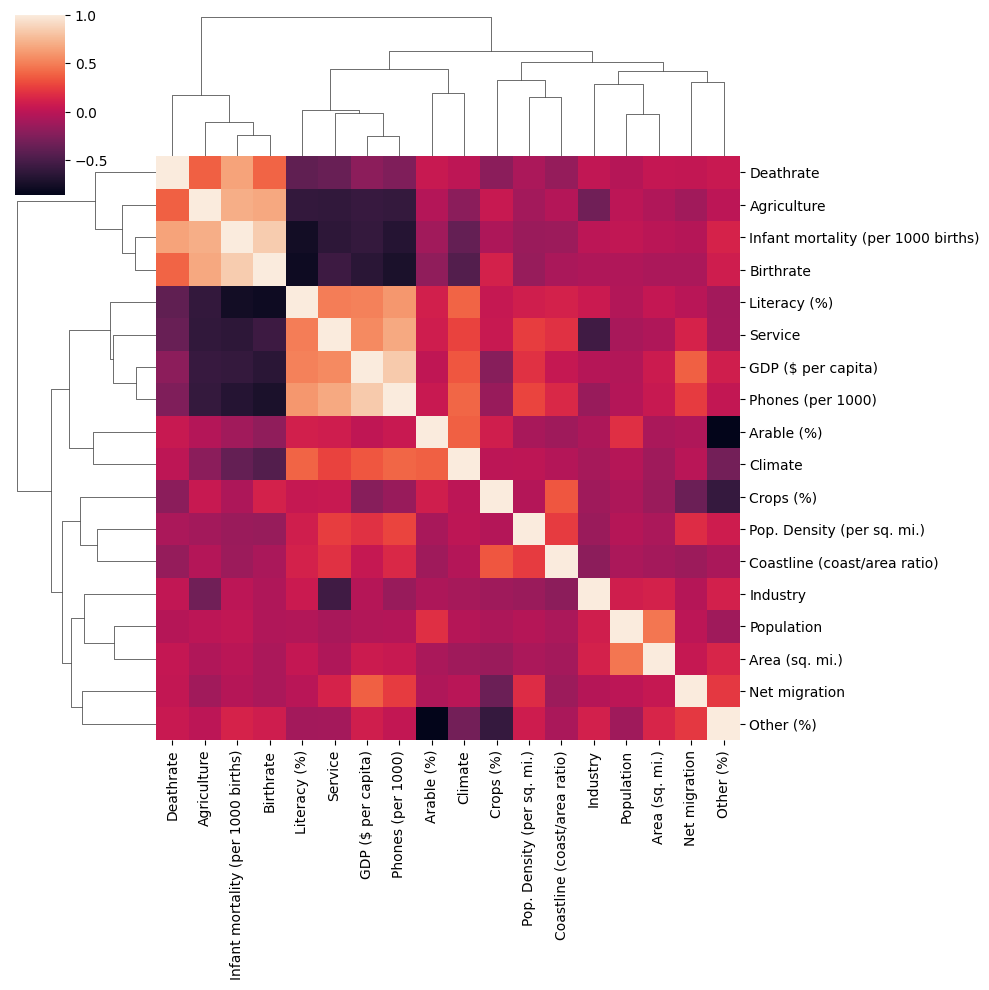

In [14]:
sns.clustermap(df.drop(['Country', 'Region'], axis=1).corr())

## Data Prep and Model Discovery

### Missing Data

In [15]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [16]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

In [17]:
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

In [18]:
df[df['Agriculture'].isnull()]['Country']

Series([], Name: Country, dtype: object)

In [19]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [20]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

In [21]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [22]:
df[df['Literacy (%)'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.000000,8.77,8.27,0.142,0.308,0.550
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,2.826087,14.05,8.70,0.270,0.110,0.620
74,Gaza Strip,NEAR EAST,1428757,360,3968.8,11.11,1.60,22.93,600.0,NaN,244.3,28.95,21.05,50.00,3.000000,39.45,3.80,0.030,0.283,0.687
85,Guernsey,WESTERN EUROPE,65409,78,838.6,64.10,3.84,4.71,20000.0,NaN,842.4,NaN,NaN,NaN,3.000000,8.81,10.01,0.030,0.100,0.870
99,Isle of Man,WESTERN EUROPE,75441,572,131.9,27.97,5.36,5.93,21000.0,NaN,676.0,9.00,0.00,91.00,3.000000,11.05,11.19,0.010,0.130,0.860
104,Jersey,WESTERN EUROPE,91084,116,785.2,60.34,2.76,5.24,24800.0,NaN,811.3,0.00,0.00,100.00,3.000000,9.30,9.28,0.050,0.020,0.930
108,Kiribati,OCEANIA,105432,811,130.0,140.94,0.00,48.52,800.0,NaN,42.7,2.74,50.68,46.58,2.000000,30.65,8.26,0.089,0.242,0.668
123,Macedonia,EASTERN EUROPE,2050554,25333,80.9,0.00,-1.45,10.09,6700.0,NaN,260.0,22.26,1.81,75.93,3.000000,12.02,8.77,0.118,0.319,0.563
185,Slovakia,EASTERN EUROPE,5439448,48845,111.4,0.00,0.30,7.41,13300.0,NaN,220.1,30.16,2.62,67.22,3.000000,10.65,9.45,0.035,0.294,0.672
187,Solomon Islands,OCEANIA,552438,28450,19.4,18.67,0.00,21.29,1700.0,NaN,13.4,0.64,2.00,97.36,2.000000,30.01,3.92,0.420,0.110,0.470


In [23]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

In [24]:
df = df.dropna()

## Data Feature Prep

In [25]:
X = df.drop('Country', axis=1)
X = pd.get_dummies(X)
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,False,False,False,False,False,False,False,False,False,False
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,False,False,True,False,False,False,False,False,False,False
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,False,False,False,False,False,True,False,False,False,False
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,False,False,False,False,False,False,False,True,False,False
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,False,False,False,False,False,False,False,False,False,True


### Scaling

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

In [27]:
X

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.000000,3.2,12.13,...,False,False,False,False,False,False,False,False,False,False
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.500000,71.2,21.09,...,False,False,True,False,False,False,False,False,False,False
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.000000,78.1,3.22,...,False,False,False,False,False,True,False,False,False,False
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.000000,259.5,10.00,...,False,False,False,False,False,False,False,True,False,False
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,497.2,2.22,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419.9,0.00,2.98,19.62,800.0,79.521429,145.2,16.90,...,False,False,False,False,True,False,False,False,False,False
223,273008,266000,1.0,0.42,0.00,0.00,0.0,0.000000,0.0,0.02,...,False,False,False,False,False,True,False,False,False,False
224,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.200000,37.2,2.78,...,False,False,False,False,True,False,False,False,False,False
225,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.600000,8.2,7.08,...,False,False,False,False,False,False,False,False,True,False


## Creating and Fitting K-Means Model

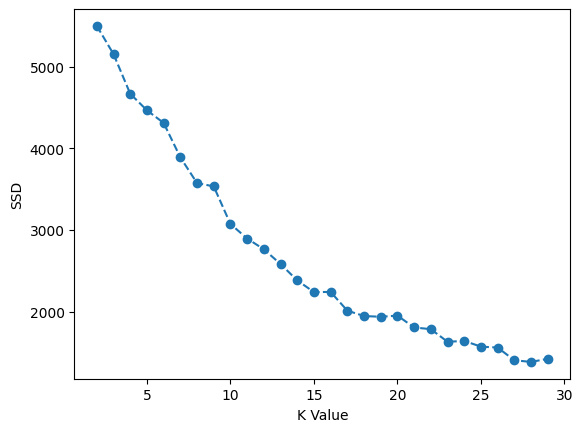

In [33]:
ssd = []

for k in range(2,30):
  model = KMeans(k, n_init='auto')
  model.fit(X_scaled)
  ssd.append(model.inertia_)

plt.plot(range(2,30), ssd, 'o--');
plt.xlabel('K Value')
plt.ylabel('SSD');

<Axes: >

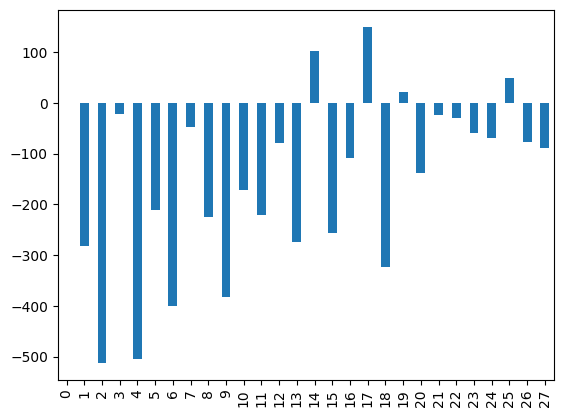

In [32]:
pd.Series(ssd).diff().plot(kind='bar')

# Model Interpretation

In [35]:
model = KMeans(n_clusters=4)
model.fit(X_scaled)
model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 3, 0, 1, 2, 0, 3,
       2, 3, 0, 1, 3, 0, 2, 0, 1, 3, 3, 3, 3, 3, 2, 0, 2, 3, 3, 0, 0, 0,
       3, 3, 3, 0, 3, 1, 0, 1, 2, 3, 0, 0, 0, 0, 0, 3, 3, 1, 3, 2, 0, 2,
       2, 0, 0, 3, 3, 0, 0, 2, 3, 2, 2, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 2,
       1, 2, 3, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 3, 0, 0, 2, 0, 0, 3,
       1, 0, 3, 3, 0, 2, 1, 2, 2, 1, 3, 3, 0, 0, 3, 2, 0, 0, 3, 1, 3, 0,
       0, 1, 0, 0, 0, 3, 3, 0, 3, 2, 0, 0, 2, 0, 3, 3, 0, 2, 0, 3, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 2, 3, 0, 3,
       0, 3, 2, 1, 1, 0, 3, 3, 2, 0, 3, 0, 3, 2, 2, 0, 2, 0, 3, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       3], dtype=int32)

In [38]:
X['K=4 Clusters'] = model.labels_
X.corr()['K=4 Clusters'].sort_values()

Region_LATIN AMER. & CARIB                   -0.396606
Literacy (%)                                 -0.379361
Region_NEAR EAST                             -0.253829
Region_OCEANIA                               -0.247415
Crops (%)                                    -0.193377
Region_C.W. OF IND. STATES                   -0.178580
Region_NORTHERN AFRICA                       -0.157139
Coastline (coast/area ratio)                 -0.142987
Phones (per 1000)                            -0.112463
Industry                                     -0.094744
Service                                      -0.067809
Region_EASTERN EUROPE                        -0.036421
Other (%)                                    -0.030979
Region_BALTICS                               -0.018668
Area (sq. mi.)                               -0.011802
Region_NORTHERN AMERICA                      -0.000430
Population                                    0.034068
GDP ($ per capita)                            0.041515
Pop. Densi